In [3]:
import matplotlib.pyplot as plt
import os
import sys
import math
import library.random as rand
import library.linalg as linalg
import library

In [10]:
config = {
"a": 1103515245,
"c": 12345,
"m": 32768,}

### Question 1

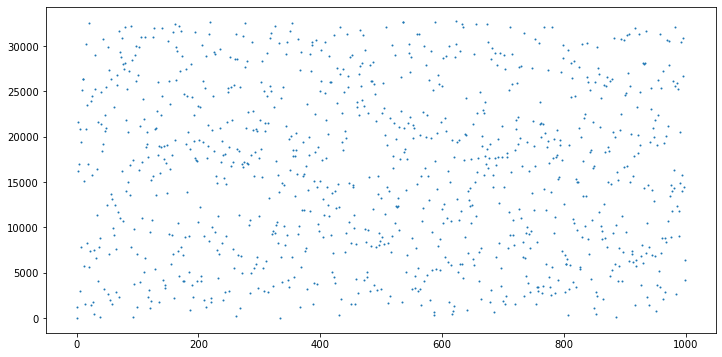

In [5]:
rand = library.random.LGC(a=config["a"] ,c=config["c"], m=config["m"], no_sample=1000)
x = library.linalg.arange(1000)
plt.figure(figsize=(12,6))
plt.scatter(x,rand, s=1)

### Question 2

In [6]:
#Our generated random values are in the range of 0.1 and 32768
#Scaling the values between 0 and 1 
def scale(rand):
    max_ = max(rand)
    min_ = min(rand)
    return list(map(lambda x: (x - min_)/(max_ - min_),rand))

def dist(x,y):
    d = ((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2)**0.5
    return d

In [7]:
no_points = 1000000*3
rand = library.random.LGC(a=config["a"], 
                          c=config["c"], 
                          m=config["m"], 
                          no_sample=no_points)
rand = scale(rand)
rand_3d =[]
rand_3d.append(rand[0:int(no_points/3)])
rand_3d.append(rand[int(no_points/3):2*int(no_points/3)])
rand_3d.append(rand[2*int(no_points/3):])

in_circle = 0
out_circle = 0
points = 0
for i in range(len(rand_3d[0])):
    x = rand_3d[0][i]
    y = rand_3d[1][i]
    z = rand_3d[2][i]
    if x>=0 and y>=0 and z>=0:
        if dist((x,y,z),(0,0,0))<=1:
            in_circle = in_circle+1
        else:
            out_circle = out_circle+1
        points = points+1
print(f"The area is {in_circle/points}")

The area is 0.520815


### Question3

In [31]:
def random_walk(steps, param):
    """
    Function to simulate a random walk using a LCG generator
    args:
    steps:Determines the number of steps taken by the agent
    """
    
    rand = library.random.LGC(a=param["a"], 
                          c=param["c"], 
                          m=param["m"], 
                          no_sample=steps*2)
    rand = scale(rand)
    rand = list(map(lambda x: 2*x-1, rand))
    rand_xy =[]
    rand_xy.append(rand[0:steps])
    rand_xy.append(rand[steps:])
    walk_x = []
    walk_y = []
    x = 0
    y = 0
    walk_x.append(x)
    walk_y.append(y)
    distance = 0
    rms = 0
    for i in range(steps):
        x = x + rand_xy[0][i]
        y = y + rand_xy[1][i]
        walk_x.append(x)
        walk_y.append(y)
        rms = rms + x*x +y*y
    rms = (rms/steps)**0.5
    distance = (x*x +y*y)**0.5
    
    return walk_x,walk_y,rms,distance

The distance of the walk is 8.389510300135381
The rmse of the walk is  4.734776060547471


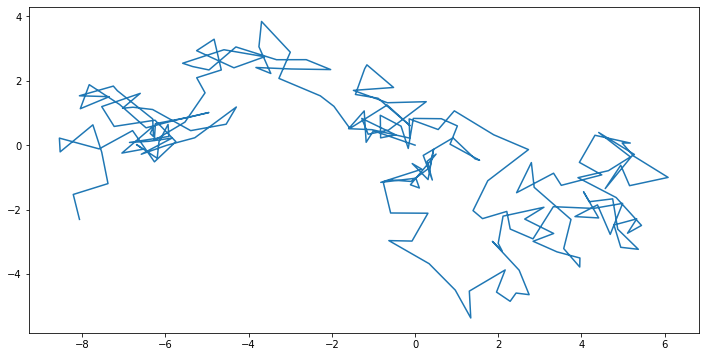

In [38]:
param = {
"a": 110325,
"c": 123435,
"m": 327746,}
walk = random_walk(200, param)
print("The distance of the walk is",walk[3])
print("The rmse of the walk is ", walk[2])
plt.figure(figsize=(12,6))
plt.plot(walk[0],walk[1])

The distance of the walk is 22.851032924490795
The rmse of the walk is  16.315055659672538


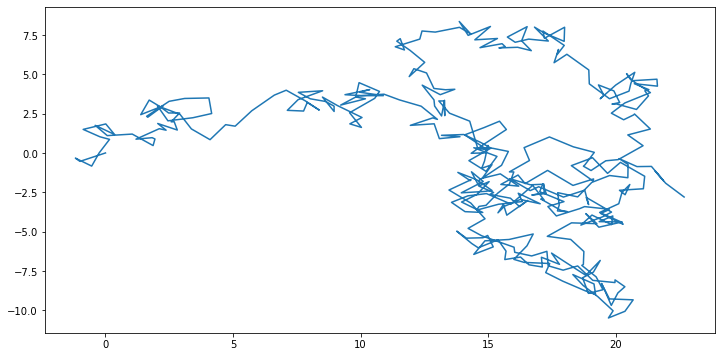

In [36]:
param = {
"a": 110385,
"c": 123475,
"m": 327766,}
walk = random_walk(400, param)
print("The distance of the walk is",walk[3])
print("The rmse of the walk is ", walk[2])
plt.figure(figsize=(12,6))
plt.plot(walk[0],walk[1])

The distance of the walk is 15.130363335586951
The rmse of the walk is  12.194687316612672


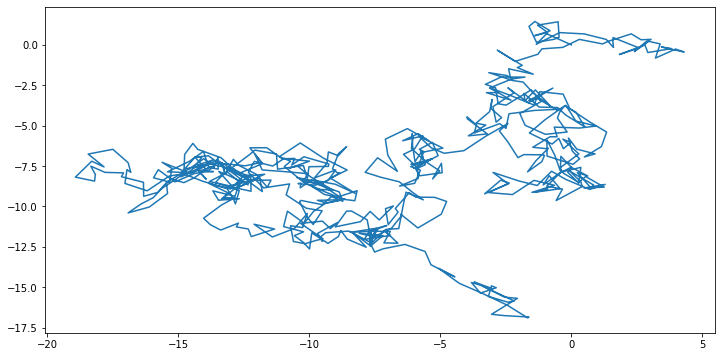

In [37]:
param = {
"a": 10385,
"c": 1423475,
"m": 27766,}
walk = random_walk(600, param)
print("The distance of the walk is",walk[3])
print("The rmse of the walk is ", walk[2])
plt.figure(figsize=(12,6))
plt.plot(walk[0],walk[1])